In [123]:
import tensorflow as tf
import pandas as pd 
import numpy as np 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import seaborn as sns

In [124]:
df = pd.read_csv("/Users/darrenlee/Desktop/portfolio/Data-science/Federated-learning/data/raw/clean_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)
train = df.loc[:'2012-05-01'].reset_index()
valid = df.loc['2012-05-02':'2012-08-01'].reset_index()
test = df.loc['2012-08-01':].reset_index()

/var/folders/1q/26x3nv656dg2gv4xzbytws5m0000gn/T/ipykernel_10533/4132024218.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  valid = df.loc['2012-05-02':'2012-08-01'].reset_index()
/var/folders/1q/26x3nv656dg2gv4xzbytws5m0000gn/T/ipykernel_10533/4132024218.py:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  test = df.loc['2012-08-01':].reset_index()


In [125]:
train.shape, valid.shape, test.shape

((343588, 23), (38215, 23), (38409, 23))

In [126]:
COLUMNS = ['Temperature',
 'Size',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Dept_1',
 'Dept_2',
 'Dept_3',
 'Dept_4',
 'Dept_5',
 'Dept_6',
 'Dept_7',
 'Dept_8',
 'Dept_9',
 'Dept_10',
 'Dept_11',
 'Dept_12',
 'Dept_13',
 'Dept_14',
 'Dept_16',
 'Dept_17',
 'Dept_18',
 'Dept_19',
 'Dept_20',
 'Dept_21',
 'Dept_22',
 'Dept_23',
 'Dept_24',
 'Dept_25',
 'Dept_26',
 'Dept_27',
 'Dept_28',
 'Dept_29',
 'Dept_30',
 'Dept_31',
 'Dept_32',
 'Dept_33',
 'Dept_34',
 'Dept_35',
 'Dept_36',
 'Dept_37',
 'Dept_38',
 'Dept_39',
 'Dept_40',
 'Dept_41',
 'Dept_42',
 'Dept_43',
 'Dept_44',
 'Dept_45',
 'Dept_46',
 'Dept_47',
 'Dept_48',
 'Dept_49',
 'Dept_50',
 'Dept_51',
 'Dept_52',
 'Dept_54',
 'Dept_55',
 'Dept_56',
 'Dept_58',
 'Dept_59',
 'Dept_60',
 'Dept_65',
 'Dept_67',
 'Dept_71',
 'Dept_72',
 'Dept_74',
 'Dept_77',
 'Dept_78',
 'Dept_79',
 'Dept_80',
 'Dept_81',
 'Dept_82',
 'Dept_83',
 'Dept_85',
 'Dept_87',
 'Dept_90',
 'Dept_91',
 'Dept_92',
 'Dept_93',
 'Dept_94',
 'Dept_95',
 'Dept_96',
 'Dept_97',
 'Dept_98',
 'Dept_99',
 'IsHoliday_False',
 'IsHoliday_True',
 'Super_Bowl_True',
 'Super_Bowl_False',
 'Type_A',
 'Type_B',
 'Type_C',
 'Labor_Day_False',
 'Labor_Day_True',
 'Thanksgiving_True',
 'Thanksgiving_False',
 'Christmas_True',
 'Christmas_False'
 ]

In [127]:
X_train = train.drop(['Weekly_Sales'], axis=1)
y_train = train['Weekly_Sales']

X_valid = valid.drop(['Weekly_Sales'], axis=1)
y_valid = valid['Weekly_Sales']

X_test = test.drop(['Weekly_Sales'], axis=1)
y_test = test['Weekly_Sales']

In [128]:
CATEGORICAL_FEATURE_KEYS = [
    'Dept',
    'IsHoliday',
    "Super_Bowl",
    "Type",
    "Labor_Day",
    "Thanksgiving",
    "Christmas"
]

NUMERIC_FEATURE_KEYS = [
    "Temperature",
    "Size",
    "Fuel_Price",
    "MarkDown1",
    "MarkDown2",
    "MarkDown3",
    "MarkDown4",
    "MarkDown5",
    "CPI",
]

In [129]:
ct = ColumnTransformer(
    [("Numeric", StandardScaler(), NUMERIC_FEATURE_KEYS),
     ("Categorical", OneHotEncoder(handle_unknown='infrequent_if_exist'), CATEGORICAL_FEATURE_KEYS)
    ])

In [130]:
pipeline = Pipeline(steps=[('preprocessor', ct)])
X_train_trans = pipeline.fit_transform(X_train)
X_valid_trans = pipeline.transform(X_valid)
X_test_trans = pipeline.transform(X_test)
trans_col = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(CATEGORICAL_FEATURE_KEYS)

In [131]:
X_train_trans

<343588x103 sparse matrix of type '<class 'numpy.float64'>'
	with 5497408 stored elements in Compressed Sparse Row format>

In [132]:
X_train_nn = X_train_trans.toarray()
X_train_nn = pd.DataFrame(X_train_nn, columns = NUMERIC_FEATURE_KEYS + trans_col.tolist())

X_valid_nn = X_valid_trans.toarray()
X_valid_nn = pd.DataFrame(X_valid_nn, columns = NUMERIC_FEATURE_KEYS + trans_col.tolist())

X_test_nn = X_test_trans.toarray()
X_test_nn = pd.DataFrame(X_test_nn, columns = NUMERIC_FEATURE_KEYS + trans_col.tolist())
X_train_nn.shape, X_test_nn.shape

((343588, 103), (38409, 103))

In [133]:
for column in COLUMNS:
    if column not in X_train_nn.columns:
        X_train_nn[column] = 0
    if column not in X_valid_nn.columns:
        X_valid_nn[column] = 0
    if column not in X_test_nn.columns:
        X_test_nn[column] = 0
X_train_nn.shape, X_test_nn.shape

((343588, 103), (38409, 103))

In [134]:
X_train_nn.columns

Index(['Temperature', 'Size', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Dept_1',
       ...
       'Super_Bowl_True', 'Type_A', 'Type_B', 'Type_C', 'Labor_Day_False',
       'Labor_Day_True', 'Thanksgiving_False', 'Thanksgiving_True',
       'Christmas_False', 'Christmas_True'],
      dtype='object', length=103)

In [135]:
for i in X_train_nn.columns:
    if i not in COLUMNS:
        print(i)

In [136]:
# X_train_nn = X_train_nn.toarray()
X_train_nn = tf.convert_to_tensor(X_train_nn)
y_train_nn = tf.convert_to_tensor(y_train)

X_valid_nn = tf.convert_to_tensor(X_valid_nn)
y_valid_nn = tf.convert_to_tensor(y_valid)

# X_test_nn = X_test_nn.toarray()
X_test_nn = tf.convert_to_tensor(X_test_nn)
y_test_nn = tf.convert_to_tensor(y_test)

In [137]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None,103)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(2000, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(250, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])


model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    # loss=tf.keras.losses.MeanSquaredError(),
    loss=tf.keras.losses.MeanAbsoluteError(),
    metrics=[
        tf.keras.metrics.mean_squared_error,
        tf.keras.metrics.mean_absolute_error,
    ]
)

In [138]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    min_delta= 250,
    restore_best_weights=True,
)

history = model.fit(
    X_train_nn, y_train_nn, epochs=100, callbacks =[early_stopping],batch_size=100 ,validation_data=(X_valid_nn, y_valid_nn)
)

Epoch 1/100


2022-12-16 21:01:24.708167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3436/3436 [==============================] - ETA: 0s - loss: 5424.6787 - mean_squared_error: 140071808.0000 - mean_absolute_error: 5424.6787WARNING:tensorflow:Model was constructed with shape (None, None, 103) for input KerasTensor(type_spec=TensorSpec(shape=(None, None, 103), dtype=tf.float32, name='dense_104_input'), name='dense_104_input', description="created by layer 'dense_104_input'"), but it was called on an input with incompatible shape (None, 103).


2022-12-16 21:02:16.551354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3436/3436 [==============================] - 55s 16ms/step - loss: 5424.6787 - mean_squared_error: 140071808.0000 - mean_absolute_error: 5424.6787 - val_loss: 4638.2549 - val_mean_squared_error: 75504400.0000 - val_mean_absolute_error: 4638.2549
Epoch 2/100
3436/3436 [==============================] - 53s 15ms/step - loss: 4586.6821 - mean_squared_error: 105212688.0000 - mean_absolute_error: 4586.6821 - val_loss: 4364.2686 - val_mean_squared_error: 72345528.0000 - val_mean_absolute_error: 4364.2690
Epoch 3/100
3436/3436 [==============================] - 53s 15ms/step - loss: 4262.7075 - mean_squared_error: 90987984.0000 - mean_absolute_error: 4262.7075 - val_loss: 4767.5254 - val_mean_squared_error: 145918592.0000 - val_mean_absolute_error: 4767.5259
Epoch 4/100
3436/3436 [==============================] - 52s 15ms/step - loss: 3979.5056 - mean_squared_error: 80128168.0000 - mean_absolute_error: 3979.5056 - val_loss: 4344.7554 - val_mean_squared_error: 81623592.0000 - val_mean_absolut

<AxesSubplot: >

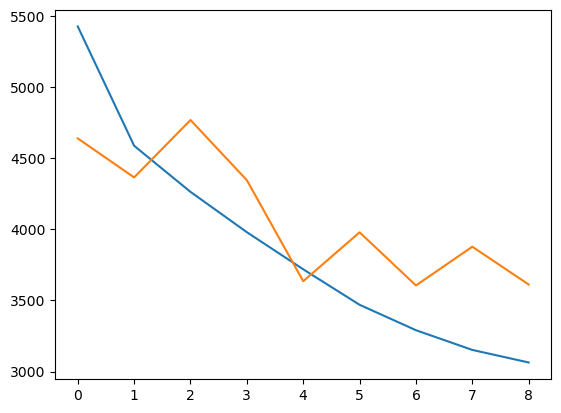

In [139]:
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])

<AxesSubplot: >

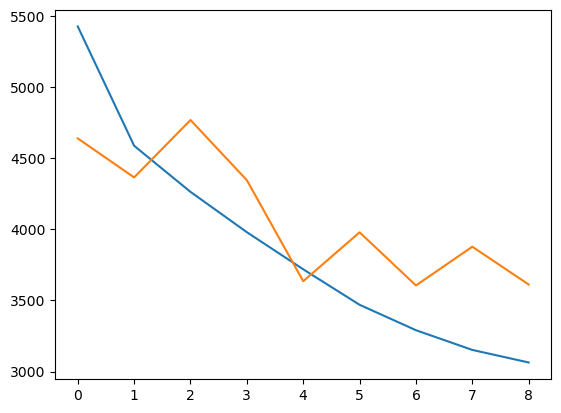

In [140]:
sns.lineplot(history.history['mean_absolute_error'])
sns.lineplot(history.history['val_mean_absolute_error'])

In [141]:
model.evaluate(X_test_nn, y_test_nn)

1201/1201 [==============================] - 7s 6ms/step - loss: 3659.5774 - mean_squared_error: 52302452.0000 - mean_absolute_error: 3659.5774


[3659.577392578125, 52302452.0, 3659.577392578125]

# Store level accuracy

In [142]:
%cd ..
%ls

/Users/darrenlee/Desktop/portfolio/Data-science
Federated-learning/  README.md            advanced_tensorflow/


In [144]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
from src.data import load_data
from src.model import Model
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
df = pd.DataFrame()
failed = []

In [148]:
for i in range(0, 45):
    # path = os.path.join("./data/store_level_data/", "store_" + str(i))
    X_train, y_train,_ ,_, X_test, y_test = load_data(str(i+1), data_dir="./data/store_level_data/")
    loss, train_mean_squared_error, train_mean_absolute_error = model.evaluate(
            X_train, y_train, batch_size=100
        )
    loss, test_mean_squared_error, test_mean_absolute_error = model.evaluate(
            X_test, y_test, batch_size=100
        )

    df_sub = pd.DataFrame({"Store":[str(i+1)],
                        "train_mse": [train_mean_squared_error],
                        "train_mae":[train_mean_absolute_error],
                        "test_mse": [test_mean_squared_error],
                        "test_mae":[test_mean_absolute_error],
                        "training_history": history }
                        )
    df = pd.concat([df, df_sub])

    # try:
    #     loss, train_mean_squared_error, train_mean_absolute_error = model.evaluate(
    #             X_train, y_train
    #         )
    #     loss, test_mean_squared_error, test_mean_absolute_error = model.evaluate(
    #             X_test, y_test
    #         )

    #     df_sub = pd.DataFrame({"Store":[str(i+1)],
    #                         "train_mse": [train_mean_squared_error],
    #                         "train_mae":[train_mean_absolute_error],
    #                         "test_mse": [test_mean_squared_error],
    #                         "test_mae":[test_mean_absolute_error],
    #                         "training_history": history }
    #                         )
    #     df = pd.concat([df, df_sub])
    # except:
    #     failed.append(str(i+1))

9/9 [==============================] - 0s 11ms/step - loss: 68990.3438 - mean_squared_error: 5952645120.0000 - mean_absolute_error: 68990.3516


In [149]:
df

,Store,train_mse,train_mae,test_mse,test_mae,training_history
0,1,1.005543e+09,19959.917969,1.185347e+09,27727.501953,<keras.callbacks.History object at 0x2eb49e730>
0,2,1.219983e+09,21333.646484,1.290688e+09,21631.259766,<keras.callbacks.History object at 0x2eb49e730>
0,3,7.660115e+10,256960.921875,5.422691e+10,225642.734375,<keras.callbacks.History object at 0x2eb49e730>
0,4,1.367888e+09,23435.158203,1.565895e+09,25550.964844,<keras.callbacks.History object at 0x2eb49e730>
0,5,2.384933e+10,134558.421875,1.614920e+10,117975.070312,<keras.callbacks.History object at 0x2eb49e730>
0,6,8.379377e+08,19495.556641,9.114089e+08,24689.607422,<keras.callbacks.History object at 0x2eb49e730>
0,7,2.975117e+08,9470.584961,5.339560e+08,14498.938477,<keras.callbacks.History object at 0x2eb49e730>
0,8,1.644736e+09,27825.529297,4.305717e+08,13429.079102,<keras.callbacks.History object at 0x2eb49e730>
0,9,4.264595e+09,50392.218750,1.377139e+09,29863.437500,<keras.callbacks.History object at 0x2eb49e730>
0,10,1.335631e+09,22790.083984,1.269919e+09,27886.595703,<keras.callbacks.History object at 0x2eb49e730>


In [150]:
%ls

README.md  conda.yml  data/      models/    notebooks/ src/


In [122]:
df.to_csv("./data/performance/centralised_result.csv", index=False)